In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

no_show = pd.read_csv('no_show.csv')
clinics = pd.read_csv('clinics.csv')
planning_neighborhoods = pd.read_csv('planning_neighborhoods.csv')
no_show_historical = pd.read_csv('no_show_historical.csv')

print("No Show Columns:", no_show.columns)
print("Clinics Columns:", clinics.columns)
print("Planning Neighborhoods Columns:", planning_neighborhoods.columns)
print("No Show Historical Columns:", no_show_historical.columns)


if 'Clinic Location' in no_show.columns and 'clinic' in clinics.columns:
    data = pd.merge(no_show, clinics, left_on='Clinic Location', right_on='clinic')
    print('Successfully merged now show and clinic')
    print('Data Columns :',data.columns)
else:
    print("Clinic Location column not found in one of the dataframes.")
    data = no_show

if 'Neighborhood' in data.columns and 'neighborho' in planning_neighborhoods.columns:
    data = pd.merge(data, planning_neighborhoods, left_on='Neighborhood', right_on='neighborho')
    print('Successfully merged data and planning_neighborhoods ')
    print('data columns :',data.columns)
else:
    print("Neighborhood column not found in one of the dataframes.")


if 'Patient ID' in data.columns and 'Patient ID' in no_show_historical.columns:
    data = pd.merge(data, no_show_historical, on='Patient ID')
    print('Successfully merged data and no show historical: ')
    print('data colums: ',data.columns)
else:
    print("Patient ID column not found in one of the dataframes.")

No Show Columns: Index(['no_show', 'Patient ID', 'Appointment ID', 'Gender', 'Age',
       'Alcohol Consumption', 'Hypertension', 'Diabetes', 'Appointment Date',
       'Schedule Date', 'Appointment Reason', 'Clinic Location', 'Specialty',
       'Neighborhood'],
      dtype='object')
Clinics Columns: Index(['name', 'type', 'addr1', 'addr2', 'clinic', 'lat', 'long'], dtype='object')
Planning Neighborhoods Columns: Index(['the_geom', 'neighborho'], dtype='object')
No Show Historical Columns: Index(['Patient ID', 'no_show'], dtype='object')
Successfully merged now show and clinic
Data Columns : Index(['no_show', 'Patient ID', 'Appointment ID', 'Gender', 'Age',
       'Alcohol Consumption', 'Hypertension', 'Diabetes', 'Appointment Date',
       'Schedule Date', 'Appointment Reason', 'Clinic Location', 'Specialty',
       'Neighborhood', 'name', 'type', 'addr1', 'addr2', 'clinic', 'lat',
       'long'],
      dtype='object')
Successfully merged data and planning_neighborhoods 
data columns

In [3]:
print(data.columns)

Index(['no_show_x', 'Patient ID', 'Appointment ID', 'Gender', 'Age',
       'Alcohol Consumption', 'Hypertension', 'Diabetes', 'Appointment Date',
       'Schedule Date', 'Appointment Reason', 'Clinic Location', 'Specialty',
       'Neighborhood', 'name', 'type', 'addr1', 'addr2', 'clinic', 'lat',
       'long', 'the_geom', 'neighborho', 'no_show_y'],
      dtype='object')


In [4]:
# Combine no_show_x and no_show_y into a single column
if 'no_show_x' in data.columns and 'no_show_y' in data.columns:
    data['target_no_show'] = data['no_show_x'].fillna(data['no_show_y'])
    print(data)
else:
    raise KeyError("One or both of 'no_show_x' and 'no_show_y' columns not found in the data.")

       no_show_x                            Patient ID  \
0          False  6aed1859-fb9e-455b-b026-5043c8159e40   
1          False  6aed1859-fb9e-455b-b026-5043c8159e40   
2          False  6aed1859-fb9e-455b-b026-5043c8159e40   
3          False  39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
4          False  39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
...          ...                                   ...   
19195      False  3aee3596-605c-415e-bc57-4b79fd582724   
19196      False  3aee3596-605c-415e-bc57-4b79fd582724   
19197      False  1aad9773-3f65-461e-86a3-57be64c5409e   
19198      False  1aad9773-3f65-461e-86a3-57be64c5409e   
19199      False  1aad9773-3f65-461e-86a3-57be64c5409e   

                             Appointment ID Gender  Age Alcohol Consumption  \
0      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71             10/week   
1      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71             10/week   
2      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71           

In [5]:
# Assuming 'data' is your DataFrame and 'target_no_show' column has been created as per your code

# Count the number of True and False values in 'target_no_show'
value_counts = data['target_no_show'].value_counts()

# Get the total number of rows in 'target_no_show'
total_rows = len(data['target_no_show'])

# Display the results
true_count = value_counts.get(True, 0)
false_count = value_counts.get(False, 0)

print(f"Count of True values: {true_count}")
print(f"Count of False values: {false_count}")
print(f"Total number of rows: {total_rows}")

Count of True values: 1869
Count of False values: 17331
Total number of rows: 19200


In [6]:
# Drop the original no_show columns
data.drop(['no_show_x', 'no_show_y'], axis=1, inplace=True)
print(data)

                                 Patient ID  \
0      6aed1859-fb9e-455b-b026-5043c8159e40   
1      6aed1859-fb9e-455b-b026-5043c8159e40   
2      6aed1859-fb9e-455b-b026-5043c8159e40   
3      39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
4      39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
...                                     ...   
19195  3aee3596-605c-415e-bc57-4b79fd582724   
19196  3aee3596-605c-415e-bc57-4b79fd582724   
19197  1aad9773-3f65-461e-86a3-57be64c5409e   
19198  1aad9773-3f65-461e-86a3-57be64c5409e   
19199  1aad9773-3f65-461e-86a3-57be64c5409e   

                             Appointment ID Gender  Age Alcohol Consumption  \
0      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71             10/week   
1      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71             10/week   
2      fa910ce8-ad23-4ebd-ad65-57162a77b44c      M   71             10/week   
3      b18573af-1297-4b38-8ebe-c2da1aad1a1d      F   47              5/week   
4      b18573af-1297-4b38-8ebe-c2da1aad1

In [7]:
print("Columns after creating target_no_show:", data.columns)
print("Sample rows of target_no_show:\n", data[['target_no_show']].head())

print(data)

Columns after creating target_no_show: Index(['Patient ID', 'Appointment ID', 'Gender', 'Age', 'Alcohol Consumption',
       'Hypertension', 'Diabetes', 'Appointment Date', 'Schedule Date',
       'Appointment Reason', 'Clinic Location', 'Specialty', 'Neighborhood',
       'name', 'type', 'addr1', 'addr2', 'clinic', 'lat', 'long', 'the_geom',
       'neighborho', 'target_no_show'],
      dtype='object')
Sample rows of target_no_show:
    target_no_show
0           False
1           False
2           False
3           False
4           False
                                 Patient ID  \
0      6aed1859-fb9e-455b-b026-5043c8159e40   
1      6aed1859-fb9e-455b-b026-5043c8159e40   
2      6aed1859-fb9e-455b-b026-5043c8159e40   
3      39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
4      39042c79-f823-4f3f-b8e7-d2e43cf3aa39   
...                                     ...   
19195  3aee3596-605c-415e-bc57-4b79fd582724   
19196  3aee3596-605c-415e-bc57-4b79fd582724   
19197  1aad9773-3f65-461e-86a3

In [8]:
data.head()

,Patient ID,Appointment ID,Gender,Age,Alcohol Consumption,Hypertension,Diabetes,Appointment Date,Schedule Date,Appointment Reason,...,name,type,addr1,addr2,clinic,lat,long,the_geom,neighborho,target_no_show
0,6aed1859-fb9e-455b-b026-5043c8159e40,fa910ce8-ad23-4ebd-ad65-57162a77b44c,M,71,10/week,False,False,2021-06-14T10:30:00,2021-03-19T00:00:00,"THERAPEUTIC EXERCISES,Inj ferric carboxymaltos...",...,Parnassus,Hospitals & Clinics,400 Parnassus Ave.,"San Francisco, CA 94143",Mission Bay,37.764124,-122.456572,MULTIPOLYGON (((-122.40876689550858 37.7901633...,Chinatown,False
1,6aed1859-fb9e-455b-b026-5043c8159e40,fa910ce8-ad23-4ebd-ad65-57162a77b44c,M,71,10/week,False,False,2021-06-14T10:30:00,2021-03-19T00:00:00,"THERAPEUTIC EXERCISES,Inj ferric carboxymaltos...",...,Mount Zion,Hospitals & Clinics,1600 Divisadero St.,"San Francisco, CA 94115",Mission Bay,37.784882,-122.438723,MULTIPOLYGON (((-122.40876689550858 37.7901633...,Chinatown,False
2,6aed1859-fb9e-455b-b026-5043c8159e40,fa910ce8-ad23-4ebd-ad65-57162a77b44c,M,71,10/week,False,False,2021-06-14T10:30:00,2021-03-19T00:00:00,"THERAPEUTIC EXERCISES,Inj ferric carboxymaltos...",...,Mission Bay,Hospitals & Clinics,1825 Fourth St.,"San Francisco, CA 94158",Mission Bay,37.766561,-122.389948,MULTIPOLYGON (((-122.40876689550858 37.7901633...,Chinatown,False
3,39042c79-f823-4f3f-b8e7-d2e43cf3aa39,b18573af-1297-4b38-8ebe-c2da1aad1a1d,F,47,5/week,False,True,2020-03-09T11:45:00,2019-12-19T00:00:00,ROUTINE VENIPUNCTURE,...,Parnassus,Hospitals & Clinics,400 Parnassus Ave.,"San Francisco, CA 94143",Mission Bay,37.764124,-122.456572,MULTIPOLYGON (((-122.45912298496032 37.7082180...,Ocean View,False
4,39042c79-f823-4f3f-b8e7-d2e43cf3aa39,b18573af-1297-4b38-8ebe-c2da1aad1a1d,F,47,5/week,False,True,2020-03-09T11:45:00,2019-12-19T00:00:00,ROUTINE VENIPUNCTURE,...,Mount Zion,Hospitals & Clinics,1600 Divisadero St.,"San Francisco, CA 94115",Mission Bay,37.784882,-122.438723,MULTIPOLYGON (((-122.45912298496032 37.7082180...,Ocean View,False


In [9]:
# Preprocess data
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})
mapping_dict = {
    '0/week': 0,
    '1/week': 1,
    '5/week': 2,
    '10/week': 3,
    '> 14/week': 4
}
# data['Alcohol Consumption'] = data['Alcohol Consumption'].map({'0/week': 0, '5/week': 1, '> 14/week': 2})
data['Alcohol Consumption'] = data['Alcohol Consumption'].map(mapping_dict)
data['target_no_show'] = data['target_no_show'].astype(int)
data['Hypertension'] = data['Hypertension'].astype(int)
data['Diabetes'] = data['Diabetes'].astype(int)


print(data['Alcohol Consumption'].head())

0    3
1    3
2    3
3    2
4    2
Name: Alcohol Consumption, dtype: int64


In [10]:
# Create age groups
data['age_group'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])
data = pd.get_dummies(data, columns=['age_group'], drop_first=True)

data.head()

,Patient ID,Appointment ID,Gender,Age,Alcohol Consumption,Hypertension,Diabetes,Appointment Date,Schedule Date,Appointment Reason,...,clinic,lat,long,the_geom,neighborho,target_no_show,age_group_30-40,age_group_40-50,age_group_50-60,age_group_>60
0,6aed1859-fb9e-455b-b026-5043c8159e40,fa910ce8-ad23-4ebd-ad65-57162a77b44c,0,71,3,0,0,2021-06-14T10:30:00,2021-03-19T00:00:00,"THERAPEUTIC EXERCISES,Inj ferric carboxymaltos...",...,Mission Bay,37.764124,-122.456572,MULTIPOLYGON (((-122.40876689550858 37.7901633...,Chinatown,0,False,False,False,True
1,6aed1859-fb9e-455b-b026-5043c8159e40,fa910ce8-ad23-4ebd-ad65-57162a77b44c,0,71,3,0,0,2021-06-14T10:30:00,2021-03-19T00:00:00,"THERAPEUTIC EXERCISES,Inj ferric carboxymaltos...",...,Mission Bay,37.784882,-122.438723,MULTIPOLYGON (((-122.40876689550858 37.7901633...,Chinatown,0,False,False,False,True
2,6aed1859-fb9e-455b-b026-5043c8159e40,fa910ce8-ad23-4ebd-ad65-57162a77b44c,0,71,3,0,0,2021-06-14T10:30:00,2021-03-19T00:00:00,"THERAPEUTIC EXERCISES,Inj ferric carboxymaltos...",...,Mission Bay,37.766561,-122.389948,MULTIPOLYGON (((-122.40876689550858 37.7901633...,Chinatown,0,False,False,False,True
3,39042c79-f823-4f3f-b8e7-d2e43cf3aa39,b18573af-1297-4b38-8ebe-c2da1aad1a1d,1,47,2,0,1,2020-03-09T11:45:00,2019-12-19T00:00:00,ROUTINE VENIPUNCTURE,...,Mission Bay,37.764124,-122.456572,MULTIPOLYGON (((-122.45912298496032 37.7082180...,Ocean View,0,False,True,False,False
4,39042c79-f823-4f3f-b8e7-d2e43cf3aa39,b18573af-1297-4b38-8ebe-c2da1aad1a1d,1,47,2,0,1,2020-03-09T11:45:00,2019-12-19T00:00:00,ROUTINE VENIPUNCTURE,...,Mission Bay,37.784882,-122.438723,MULTIPOLYGON (((-122.45912298496032 37.7082180...,Ocean View,0,False,True,False,False


In [11]:
# Convert date columns to datetime format
data['Appointment Date'] = pd.to_datetime(data['Appointment Date'])
data['Schedule Date'] = pd.to_datetime(data['Schedule Date'])

# Extract features from the dates
data['appointment_day'] = data['Appointment Date'].dt.day
data['appointment_month'] = data['Appointment Date'].dt.month
data['appointment_year'] = data['Appointment Date'].dt.year
data['appointment_dayofweek'] = data['Appointment Date'].dt.dayofweek

data['schedule_day'] = data['Schedule Date'].dt.day
data['schedule_month'] = data['Schedule Date'].dt.month
data['schedule_year'] = data['Schedule Date'].dt.year
data['schedule_dayofweek'] = data['Schedule Date'].dt.dayofweek

# Calculate the difference between appointment date and schedule date
data['days_until_appointment'] = (data['Appointment Date'] - data['Schedule Date']).dt.days

# Drop the original date columns if they are not needed anymore
data.drop(columns=['Appointment Date', 'Schedule Date'], inplace=True)

# Display the first few rows to check the new features
print(data.head())


                             Patient ID                        Appointment ID  \
0  6aed1859-fb9e-455b-b026-5043c8159e40  fa910ce8-ad23-4ebd-ad65-57162a77b44c   
1  6aed1859-fb9e-455b-b026-5043c8159e40  fa910ce8-ad23-4ebd-ad65-57162a77b44c   
2  6aed1859-fb9e-455b-b026-5043c8159e40  fa910ce8-ad23-4ebd-ad65-57162a77b44c   
3  39042c79-f823-4f3f-b8e7-d2e43cf3aa39  b18573af-1297-4b38-8ebe-c2da1aad1a1d   
4  39042c79-f823-4f3f-b8e7-d2e43cf3aa39  b18573af-1297-4b38-8ebe-c2da1aad1a1d   

   Gender  Age  Alcohol Consumption  Hypertension  Diabetes  \
0       0   71                    3             0         0   
1       0   71                    3             0         0   
2       0   71                    3             0         0   
3       1   47                    2             0         1   
4       1   47                    2             0         1   

                                  Appointment Reason Clinic Location  \
0  THERAPEUTIC EXERCISES,Inj ferric carboxymaltos...     Missi

In [12]:
# Define features and target
X = data.drop(columns=['target_no_show'])
y = data['target_no_show']

In [13]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
# Initialize the scaler
scaler = StandardScaler()

In [15]:
# Drop the original date columns and unnecessary columns
non_numeric_columns = ['Patient ID', 'Appointment ID', 'Appointment Reason', 'lat', 'long', 'the_geom']
data.drop(columns=non_numeric_columns, inplace=True)

In [16]:
# Ensure target column is integer
data['target_no_show'] = data['target_no_show'].astype(int)

In [17]:
# Encode categorical variables using one-hot encoding
categorical_columns = ['Clinic Location', 'Specialty', 'neighborho']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [18]:
# Define features and target
X = data.drop(columns=['target_no_show'])
y = data['target_no_show']


In [19]:
# Encode categorical variables using one-hot encoding for remaining categorical features
X = pd.get_dummies(X, drop_first=True)

In [20]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [21]:
# Initialize the scaler
scaler = StandardScaler()

In [22]:
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# Initialize SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [24]:
# Fit SMOTE on the training data
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [25]:
# Define the model
model = RandomForestClassifier(random_state=42)

In [26]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring='f1')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [27]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
# Train the best model on the full training data
best_model = grid_search.best_estimator_

In [29]:
# Predict on the test data
y_pred = best_model.predict(X_test_scaled)

In [30]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3466
           1       0.74      0.05      0.10       374

    accuracy                           0.91      3840
   macro avg       0.82      0.53      0.53      3840
weighted avg       0.89      0.91      0.87      3840



In [38]:
print(confusion_matrix(y_test, y_pred))

[[3459    7]
 [ 354   20]]


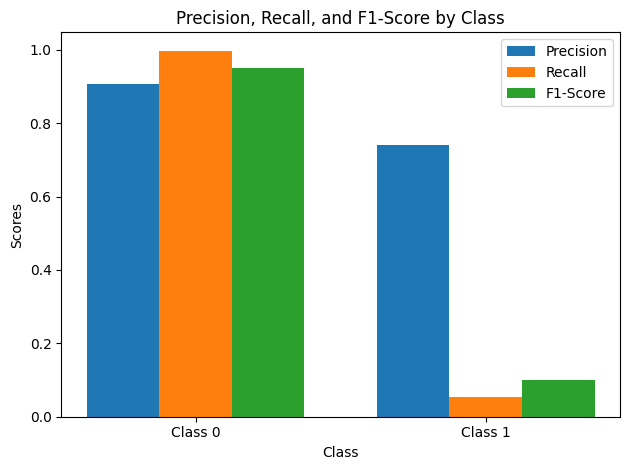

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and f1-score for both classes
labels = ['Class 0', 'Class 1']
precision = [report['0']['precision'], report['1']['precision']]
recall = [report['0']['recall'], report['1']['recall']]
f1_score = [report['0']['f1-score'], report['1']['f1-score']]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()


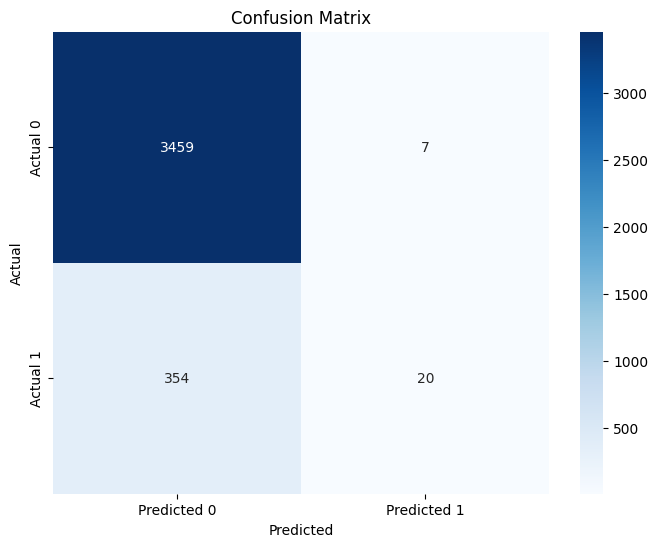

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [41]:
data['target_no_show']

0        0
1        0
2        0
3        0
4        0
        ..
19195    0
19196    0
19197    0
19198    0
19199    0
Name: target_no_show, Length: 19200, dtype: int64

In [42]:
# Count the occurrences of each value in the 'target_no_show' column
value_counts = data['target_no_show'].value_counts()

print(value_counts)

target_no_show
0    17331
1     1869
Name: count, dtype: int64


In [44]:
# Define the model with class weights
model = RandomForestClassifier(random_state=42, class_weight='balanced')


In [45]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring='f1')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [1]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Define the model
model = XGBClassifier(random_state=42, scale_pos_weight=(y_train_res == 0).sum() / (y_train_res == 1).sum())

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring='f1')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the best model on the full training data
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Compute predicted probabilities
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/govindkumargupta/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B9202094-7D52-318C-99CF-7034B0E9F28D> /Users/govindkumargupta/Library/Python/3.9/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]
